# Data Visualization

### creating visualization for Gun Violence Data (2013-2018)

#### This Script contains following:
1. Importing libraries
2. create correlation matrix heatmap
3. create scatterplot
4. create pairplot
5. create categorical plot
6. answer previously written questions regarding the data
7. define hypothesis

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#define path
path=r'/Users/yeji/Documents/Career Foundry/Achievement 6/Gun Violence Record Data Analysis'

In [3]:
#import cleaned data
df = pd.read_csv(os.path.join(path,'Data', 'Prepared Data', 'data_wrangled.csv'), index_col = 0)

In [4]:
#check head
df.head()

,incident_id,date,year,month,day,state,city_or_county,n_injured,n_killed
0,461105,2013-01-01,2013,1,1,Pennsylvania,Mckeesport,4,0
1,460726,2013-01-01,2013,1,1,California,Hawthorne,3,1
2,478855,2013-01-01,2013,1,1,Ohio,Lorain,3,1
3,478925,2013-01-05,2013,1,5,Colorado,Aurora,0,4
4,478959,2013-01-07,2013,1,7,North Carolina,Greensboro,2,2


## Correlation matrix heatmap

In [5]:
#create correlation matrix
df.corr()

,incident_id,year,month,day,n_injured,n_killed
incident_id,1.000000,0.963538,0.051235,0.017488,0.009060,0.005052
year,0.963538,1.000000,-0.166297,-0.001158,0.005972,0.003035
month,0.051235,-0.166297,1.000000,0.004923,0.017748,0.002522
day,0.017488,-0.001158,0.004923,1.000000,0.002767,-0.000542
n_injured,0.009060,0.005972,0.017748,0.002767,1.000000,-0.125425
n_killed,0.005052,0.003035,0.002522,-0.000542,-0.125425,1.000000


In [6]:
#create correlation matrix using seaborn - making subset with only numerical values
sub = df[['year','month','day','n_killed','n_injured']]

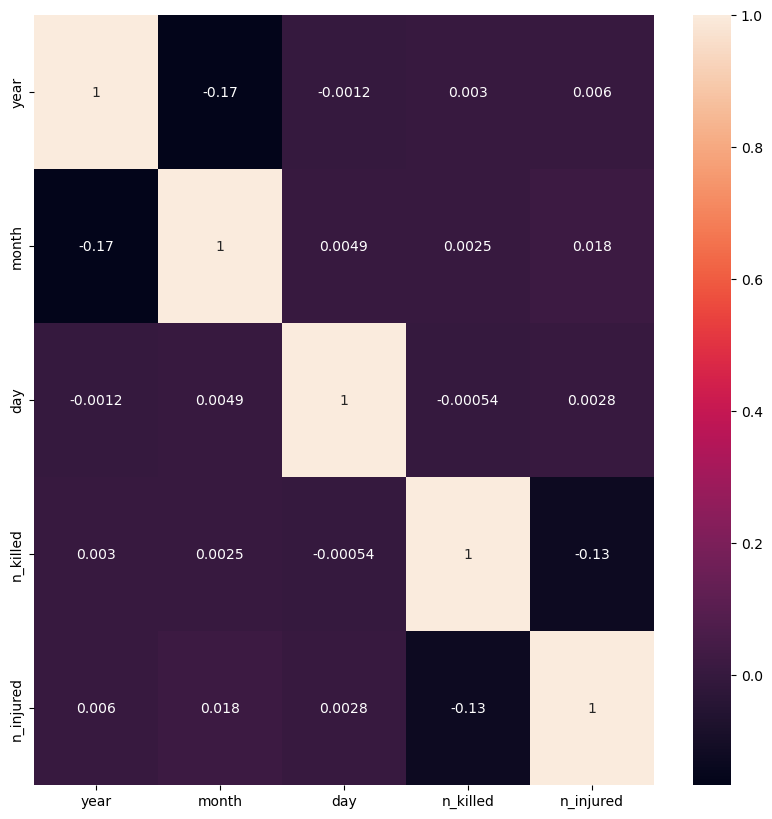

In [7]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap using seaborn 
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

In [8]:
#save figure
corr.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'heatmap.png'))

### coefficent relationship 
Numbers killed and numbers injured had a low correlation with -0.13 as well as year and month, which had correlation coefficient of -0.17. 
Highest correlation coeffient was seen between year and numbers injured but the coefficient is only 0.018, which is not a strong value. Other variables had even lower coefficient which showed that the variables had little to no correlation with one another. 

## Scatterplot

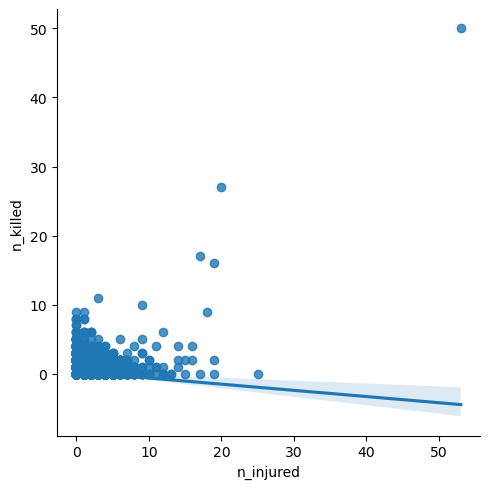

In [9]:
#create scatterplot between numbers injured and numbers killed
scatter=sns.lmplot(x = 'n_injured', y = 'n_killed', data = df)

In [10]:
#remove outlier
df_new = df[df['n_injured']<50]

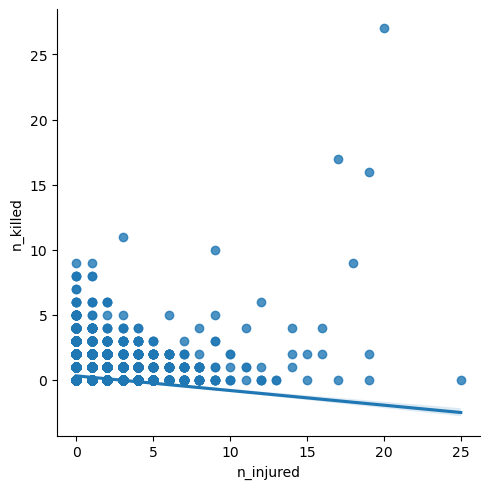

In [11]:
#new scatterplot without outlier
scatter=sns.lmplot(x = 'n_injured', y = 'n_killed', data = df_new)

### scatterplot relationship

the scatterplot shows that number of people injured and number of indivduals killed are highly concentrated in lower number. The outlier in the first graph made the graph difficult the see so once it was removed, we could clearly see that there is a negative correlation between these two variables. However, the outlier should still be counted in this case because there could have been a mass shooting one of the years that caused such high number of injured individuals. 

In [12]:
#save figure
scatter.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'scatterplot_victims_subjects_killed.png'))

## Pairplot

In [13]:
#create subset for pairplot
sub_2= df[['year','month','n_injured','n_killed']]

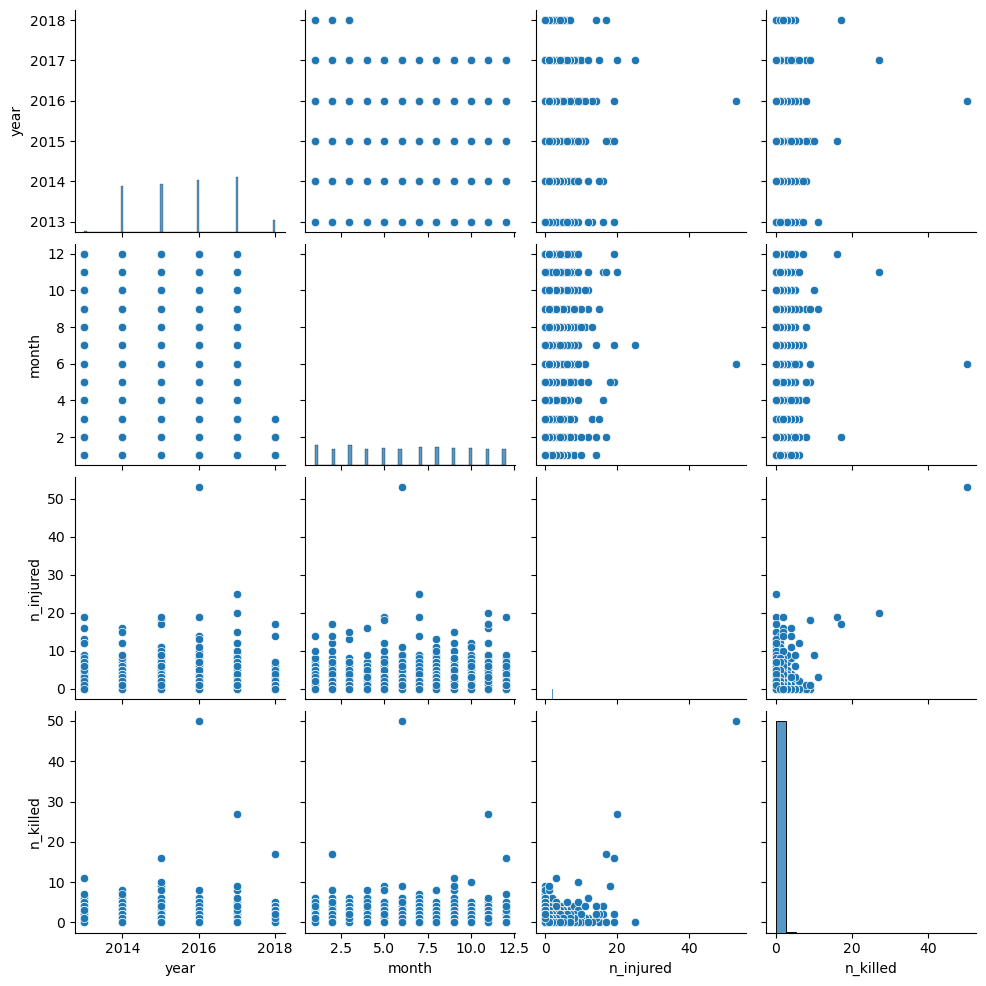

In [14]:
#create pairplot with subset
g = sns.pairplot(sub_2)

### Pairplot relationship
The pairplot shows that there was an increase in count of incidents from 2013 to 2017 but the numbers drop in 2018 because the records are only limited up to march of 2018.  Also, the number of injured and killed are fairly similar throughout the years and throughtout the months but there has been an occurence in 2016 where there is an outlier in both injured and killed. 

In [15]:
#save figure
g.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'pairplot.png'))

## Categorical plot

<AxesSubplot:xlabel='year', ylabel='Count'>

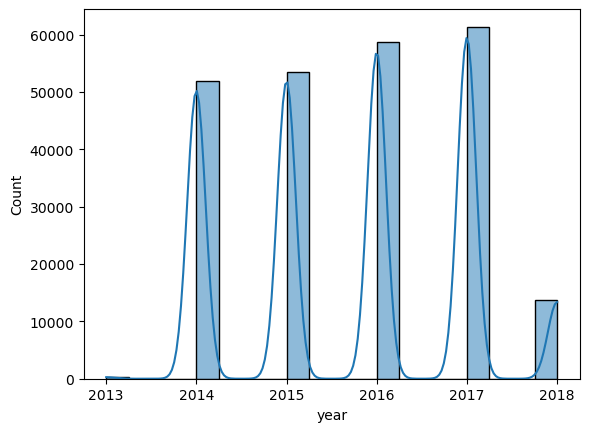

In [16]:
#create histogram to see distribution of years
sns.histplot(df['year'], bins = 20, kde = True)

In [17]:
#create subcategories with regions 
result = []

for value in df['state']:
  if value == 'Maine' or value =='New Hampshire' or value == 'Vermont'or value =='Massachusetts' or value == 'Rhode Island' or value == 'New York' or value == 'Pennsylvania' or value == 'New Jersey' or value == 'Connecticut':
    result.append('Northeast')
  elif value == 'Wisconsin' or value == 'Michigan' or value =='Illinois' or value =='Indiana' or value =='Ohio'or value == 'North Dakota' or value == 'South Dakota' or value == 'Nebraska' or value == 'Kansas' or value =='Minnesota' or value == 'Iowa' or value == 'Missouri':
    result.append('Midwest')
  elif value =='Delaware' or value =='Maryland' or value == 'District of Columbia' or value =='Virginia' or value=='West Virginia' or value=='North Carolina' or value=='South Carolina' or value=='Georgia' or value =='Florida' or value =='Kentucky' or value =='Tennessee' or value=='Mississippi' or value =='Alabama' or value=='Oklahoma' or value=='Texas' or value=='Arkansas' or value=='Louisiana':
    result.append('South')
  else:
        result.append('West')

In [18]:
df['Regions']= result

In [19]:
df['Regions'].value_counts()

South        106664
Midwest       61044
Northeast     36314
West          35655
Name: Regions, dtype: int64

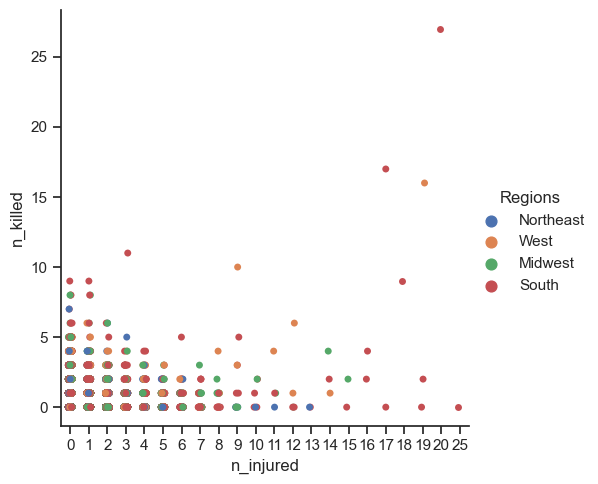

In [20]:
# Create a categorical plot with regions sub categories
sns.set(style="ticks")
region= sns.catplot(x="n_injured", y="n_killed", hue="Regions", data=df[df['n_injured']<50])

#### Analysis
I graphed the scatterplot of injured and killed with regions category to see if there was a specific geographic region with more incidents but did not find any pattern

In [21]:
#save figure
region.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'scatterplot_region_category.png'))

### Questions to be answered
1. Is there a specific region with higher number of gun violence incidents? 
    - no specific region showed higher number of incidents. 
2. Is there an increase in number of incidents throughout the year? 
    - yes, from 2013 to 2017, numbers have increased
3. Is there any correlation between time of the year and number of incidents?
    - cannot be determined yet 
4.  Is there any trend in number of incidents and region throughout the year?
     - cannot be determined yet 
5.  Which state has the highest number of cases?
     - cannot be determined yet 
6.  Are more populated cities, such as Los Angeles, New York, Chicago, have higher number of incidents?
      - cannot be determined yet
      some of the questions cannot be answered yet but geographical plotting might show answers to these questions

## Hypothesis that can be tested
1. There is an increase in number of gun violence incidents in more recent years

In [22]:
#export data
df.to_csv(os.path.join(path, 'Data','Prepared Data', 'data_with_regions.csv'))